# Tutorial: Data preprocessing

In [2]:
%load_ext autoreload
%autoreload 2

In [8]:
import numpy as np
import pandas as pd
import sys
sys.path.append('..') #('')の中に探索元のpathを書く

## Load UCI Data
UCI Adult data are going to be used in this tutorial. The data contain both numerical and categorical features, and the target to predict is whether a person makes over 50K a year. It is a very simple binary classification task.

In [4]:
train = pd.read_csv('../datasets/adult_train.csv')
test = pd.read_csv('../datasets/adult_test.csv')

# columnのspace削除
train.columns = list(map(str.strip, train.columns.tolist()))
test.columns = list(map(str.strip, test.columns.tolist()))

# check
train.columns

Index(['Age', 'Workclass', 'fnlwgt', 'Education', 'Education_Num',
       'Martial_Status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_Gain', 'Capital_Loss', 'Hours_per_week', 'Country', 'Target'],
      dtype='object')

In [5]:
train.head()

,Age,Workclass,fnlwgt,Education,Education_Num,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
test.head()

,Age,Workclass,fnlwgt,Education,Education_Num,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Target
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [12]:
from visualization import explore_data

japanize_matplotlib not found.


data shape: (32561, 15), (16281, 15)

Included columns: 
['Martial_Status', 'Sex', 'Capital_Loss', 'Occupation', 'Hours_per_week',
 'Target', 'Education_Num', 'Education', 'Age', 'Capital_Gain', 'Relationship',
 'Workclass', 'Country', 'Race', 'fnlwgt'] (15)

  0 Martial_Status: 

 n_classes=7
                           train      test
 Married-civ-spouse     0.459937  0.454702
 Never-married          0.328092  0.333763
 Divorced               0.136452  0.134513
 Separated              0.031479  0.031018
 Widowed                0.030497  0.032246
 Married-spouse-absent  0.012837  0.012898
 Married-AF-spouse      0.000706  0.000860

  1 Sex: 

 n_classes=2
            train      test
 Male    0.669205  0.667035
 Female  0.330795  0.332965

  2 Capital_Loss: 

 train NaN: 0 (0.000)
 test NaN: 0 (0.000



/Users/takuto/python-env/py37env/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/takuto/python-env/py37env/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/takuto/python-env/py37env/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level functio

  3 Occupation: 

 n_classes=15
                       train      test
 Prof-specialty     0.127146  0.124808
 Craft-repair       0.125887  0.123641
 Exec-managerial    0.124873  0.124071
 Adm-clerical       0.115783  0.113077
 Sales              0.112097  0.113875
 Other-service      0.101195  0.099994
 Machine-op-inspct  0.061485  0.062650
 ?                  0.056601  0.059333
 Transport-moving   0.049046  0.046557
 Handlers-cleaners  0.042075  0.043118
 Farming-fishing    0.030527  0.030465
 Tech-support       0.028500  0.031816
 Protective-serv    0.019932  0.020515
 Priv-house-serv    0.004576  0.005712
 Armed-Forces       0.000276  0.000369

  4 Hours_per_week: 

 train NaN: 0 (0.000)
 test NaN: 0 (0.000



/Users/takuto/python-env/py37env/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/takuto/python-env/py37env/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


  5 Target: 

 n_classes=4
           train      test
 <=50K   0.75919  0.000000
 >50K    0.24081  0.000000
 <=50K.  0.00000  0.763774
 >50K.   0.00000  0.236226

  6 Education_Num: 

 train NaN: 0 (0.000)
 test NaN: 0 (0.000



/Users/takuto/python-env/py37env/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/takuto/python-env/py37env/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


  7 Education: 

 n_classes=16
                  train      test
 HS-grad       0.322502  0.324489
 Some-college  0.223918  0.220318
 Bachelors     0.164461  0.163995
 Masters       0.052916  0.057367
 Assoc-voc     0.042443  0.041705
 11th          0.036086  0.039125
 Assoc-acdm    0.032769  0.032799
 10th          0.028654  0.028008
 7th-8th       0.019840  0.018979
 Prof-school   0.017690  0.015847
 9th           0.015786  0.014864
 12th          0.013298  0.013758
 Doctorate     0.012684  0.011117
 5th-6th       0.010227  0.010810
 1st-4th       0.005160  0.004852
 Preschool     0.001566  0.001965

  8 Age: 

 train NaN: 0 (0.000)
 test NaN: 0 (0.000



/Users/takuto/python-env/py37env/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/takuto/python-env/py37env/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


  9 Capital_Gain: 

 train NaN: 0 (0.000)
 test NaN: 0 (0.000



/Users/takuto/python-env/py37env/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


 10 Relationship: 

 n_classes=6
                    train      test
 Husband         0.405178  0.400651
 Not-in-family   0.255060  0.262760
 Own-child       0.155646  0.154352
 Unmarried       0.105832  0.103126
 Wife            0.048156  0.046864
 Other-relative  0.030128  0.032246

 11 Workclass: 

 n_classes=9
                      train      test
 Private           0.697030  0.688533
 Self-emp-not-inc  0.078038  0.081138
 Local-gov         0.064279  0.064062
 ?                 0.056386  0.059149
 State-gov         0.039864  0.041951
 Self-emp-inc      0.034274  0.035563
 Federal-gov       0.029483  0.028991
 Without-pay       0.000430  0.000430
 Never-worked      0.000215  0.000184

 12 Country: 

 n_classes=42
                                train      test
 United-States               0.895857  0.900559
 Mexico                      0.019748  0.018918
 ?                           0.017905  0.016829
 Philippines                 0.006081  0.005958
 Germany                     0.004

/Users/takuto/python-env/py37env/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/takuto/python-env/py37env/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


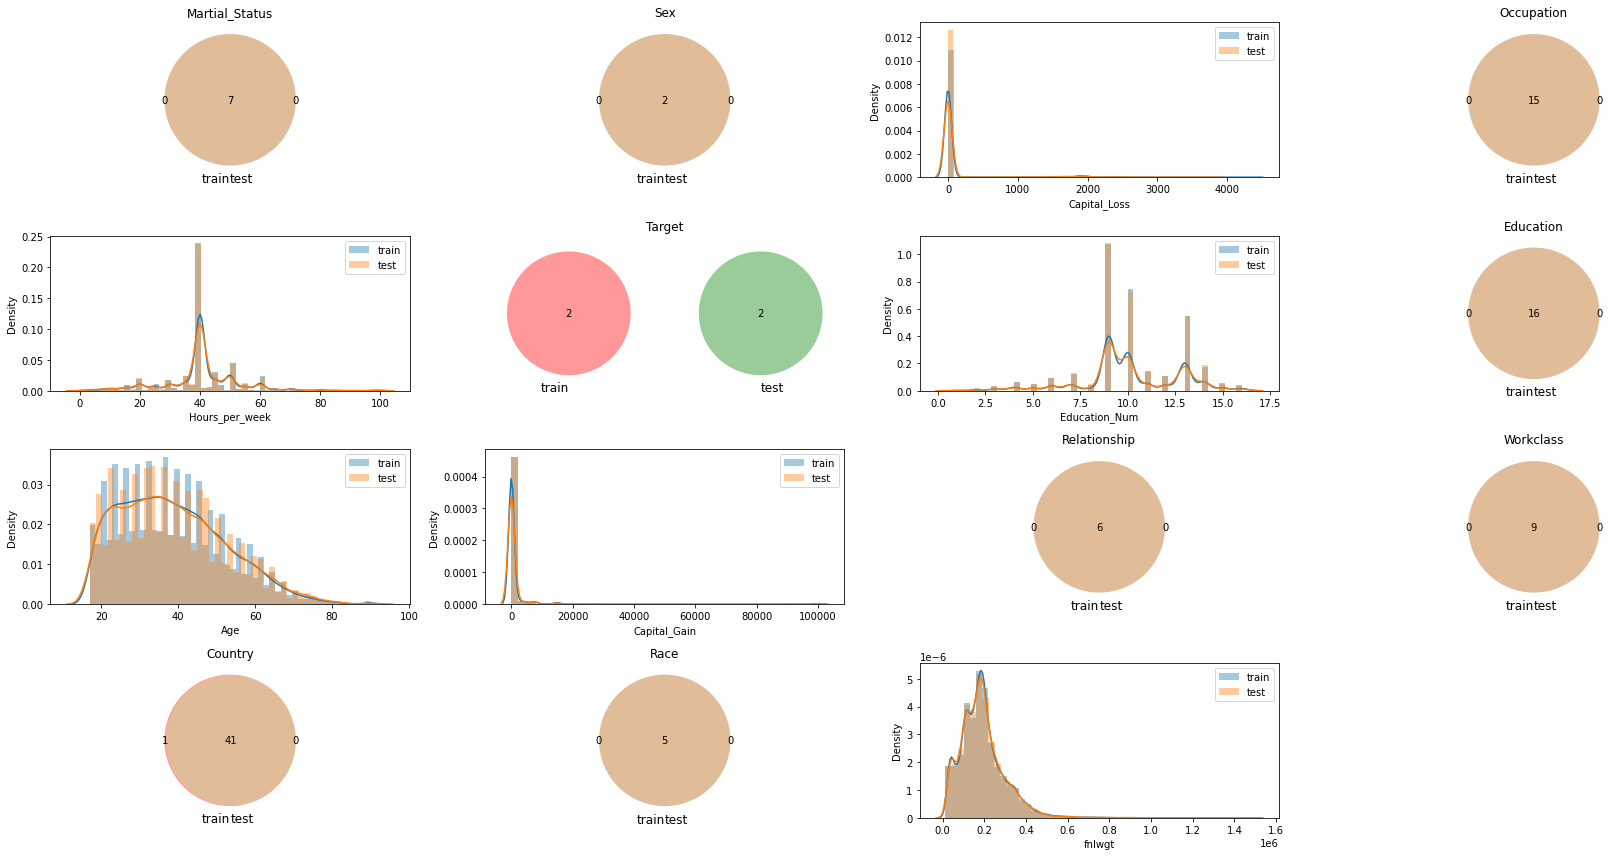

In [13]:
explore_data(train, test, exclude_columns=[])